<a href="https://colab.research.google.com/github/ritusingla/deep-image-prior/blob/master/final_flash_no_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for **"Flash/No Flash"** figure. 

In [1]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/ritusingla/deep-image-prior
!mv deep-image-prior/* ./

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 523 (delta 65), reused 149 (delta 41), pack-reused 308
Receiving objects: 100% (523/523), 212.59 MiB | 18.55 MiB/s, done.
Resolving deltas: 100% (228/228), done.
Checking out files: 100% (249/249), done.


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


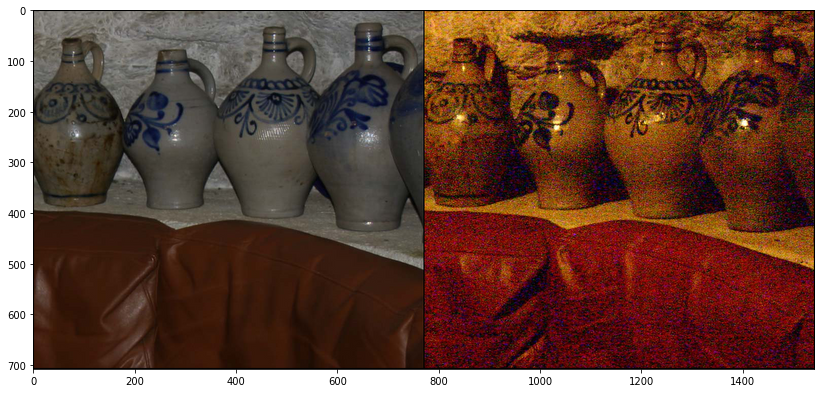

In [3]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

# Setup

In [0]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 601
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [0]:
net = skip(input_depth, 3, num_channels_down = [128, 128, 128, 128, 128], 
                        num_channels_up   = [128, 128, 128, 128, 128],
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Iteration 00000    Loss 0.142084

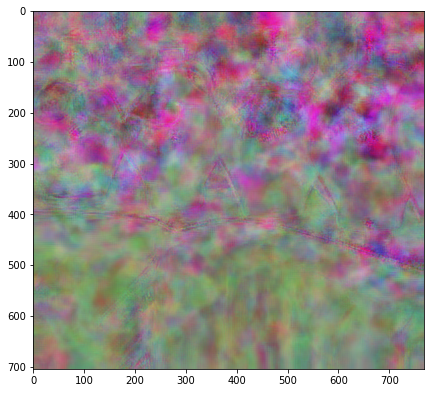

Iteration 00001    Loss 0.068242Iteration 00002    Loss 0.076893Iteration 00003    Loss 0.072436Iteration 00004    Loss 0.066692Iteration 00005    Loss 0.058316Iteration 00006    Loss 0.046222Iteration 00007    Loss 0.040073Iteration 00008    Loss 0.037603Iteration 00009    Loss 0.031275Iteration 00010    Loss 0.032110Iteration 00011    Loss 0.031072Iteration 00012    Loss 0.028662Iteration 00013    Loss 0.028180Iteration 00014    Loss 0.028233Iteration 00015    Loss 0.026933Iteration 00016    Loss 0.027485Iteration 00017    Loss 0.025708Iteration 00018    Loss 0.024604Iteration 00019    Loss 0.021146Iteration 00020    Loss 0.021509Iteration 00021    Loss 0.021662Iteration 00022    Loss 0.019932Iteration 00023    Loss 0.021425Iteration 00024    Loss 0.018387Iteration 00025    Loss 0.019100Iteration 00026    Loss 0.017313Iteration 00027    Loss 0.018968Iteration 00028    Loss 0.017338Iteration 00029    Loss 0.017938Iteration 00030    Loss 0.016578Iteration 00031    Loss 0.016990Iteratio

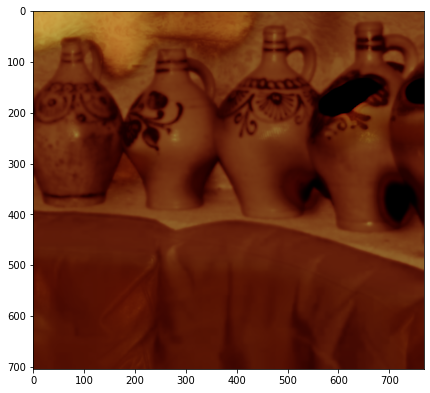

Iteration 00051    Loss 0.013362Iteration 00052    Loss 0.013328Iteration 00053    Loss 0.013239Iteration 00054    Loss 0.013019Iteration 00055    Loss 0.013223Iteration 00056    Loss 0.013021Iteration 00057    Loss 0.012814Iteration 00058    Loss 0.012739Iteration 00059    Loss 0.012700Iteration 00060    Loss 0.012492Iteration 00061    Loss 0.012490Iteration 00062    Loss 0.012415Iteration 00063    Loss 0.012243Iteration 00064    Loss 0.012202Iteration 00065    Loss 0.012178Iteration 00066    Loss 0.012028Iteration 00067    Loss 0.011885Iteration 00068    Loss 0.011876Iteration 00069    Loss 0.011751Iteration 00070    Loss 0.011590Iteration 00071    Loss 0.011559Iteration 00072    Loss 0.011568Iteration 00073    Loss 0.011364Iteration 00074    Loss 0.011390Iteration 00075    Loss 0.011154Iteration 00076    Loss 0.011141Iteration 00077    Loss 0.011032Iteration 00078    Loss 0.010887Iteration 00079    Loss 0.010833Iteration 00080    Loss 0.010685Iteration 00081    Loss 0.010639Iteratio

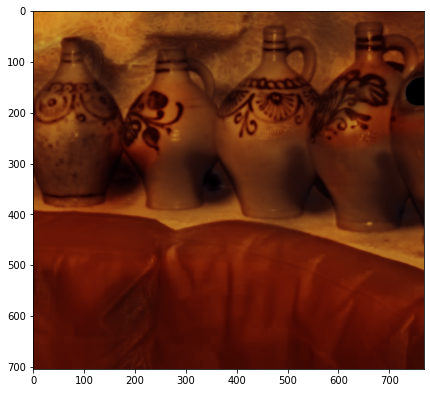

Iteration 00101    Loss 0.010253Iteration 00102    Loss 0.011431Iteration 00103    Loss 0.010786Iteration 00104    Loss 0.010274Iteration 00105    Loss 0.009393Iteration 00106    Loss 0.010092Iteration 00107    Loss 0.011440Iteration 00108    Loss 0.010316Iteration 00109    Loss 0.009664Iteration 00110    Loss 0.009696Iteration 00111    Loss 0.010360Iteration 00112    Loss 0.010502Iteration 00113    Loss 0.009594Iteration 00114    Loss 0.009695Iteration 00115    Loss 0.010521Iteration 00116    Loss 0.009318Iteration 00117    Loss 0.009369Iteration 00118    Loss 0.010008Iteration 00119    Loss 0.009304Iteration 00120    Loss 0.009116Iteration 00121    Loss 0.009490Iteration 00122    Loss 0.009118Iteration 00123    Loss 0.009007Iteration 00124    Loss 0.009068Iteration 00125    Loss 0.009044Iteration 00126    Loss 0.008976Iteration 00127    Loss 0.008764Iteration 00128    Loss 0.008948Iteration 00129    Loss 0.008868Iteration 00130    Loss 0.008715Iteration 00131    Loss 0.008770Iteratio

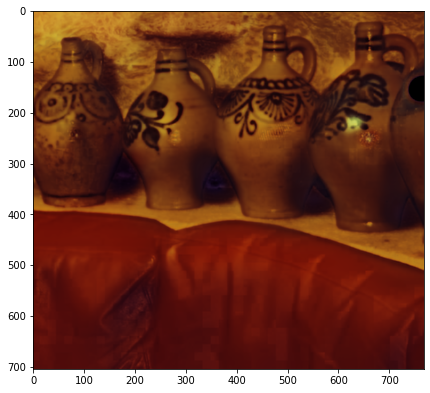

Iteration 00151    Loss 0.008352Iteration 00152    Loss 0.008273Iteration 00153    Loss 0.008264Iteration 00154    Loss 0.008285Iteration 00155    Loss 0.008262Iteration 00156    Loss 0.008179Iteration 00157    Loss 0.008227Iteration 00158    Loss 0.008195Iteration 00159    Loss 0.008208Iteration 00160    Loss 0.008188Iteration 00161    Loss 0.008123Iteration 00162    Loss 0.008098Iteration 00163    Loss 0.008148Iteration 00164    Loss 0.008816Iteration 00165    Loss 0.008664Iteration 00166    Loss 0.008651Iteration 00167    Loss 0.008747Iteration 00168    Loss 0.008781Iteration 00169    Loss 0.008713Iteration 00170    Loss 0.008392Iteration 00171    Loss 0.008322Iteration 00172    Loss 0.008312Iteration 00173    Loss 0.008489Iteration 00174    Loss 0.008515Iteration 00175    Loss 0.008407Iteration 00176    Loss 0.008238Iteration 00177    Loss 0.008189Iteration 00178    Loss 0.008111Iteration 00179    Loss 0.008150Iteration 00180    Loss 0.008175Iteration 00181    Loss 0.008144Iteratio

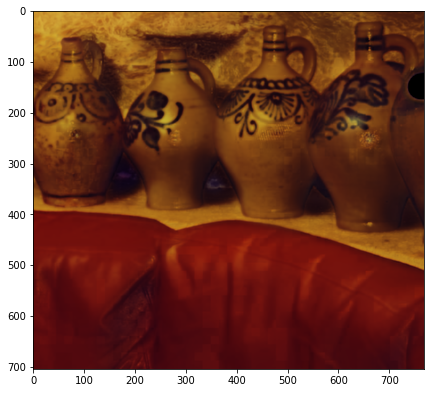

Iteration 00201    Loss 0.008228Iteration 00202    Loss 0.008251Iteration 00203    Loss 0.008278Iteration 00204    Loss 0.008178Iteration 00205    Loss 0.008043Iteration 00206    Loss 0.007924Iteration 00207    Loss 0.007939Iteration 00208    Loss 0.007949Iteration 00209    Loss 0.008018Iteration 00210    Loss 0.008047Iteration 00211    Loss 0.007963Iteration 00212    Loss 0.007875Iteration 00213    Loss 0.007785Iteration 00214    Loss 0.007721Iteration 00215    Loss 0.007717Iteration 00216    Loss 0.007688Iteration 00217    Loss 0.007699Iteration 00218    Loss 0.007711Iteration 00219    Loss 0.007694Iteration 00220    Loss 0.007707Iteration 00221    Loss 0.007789Iteration 00222    Loss 0.007956Iteration 00223    Loss 0.008159Iteration 00224    Loss 0.007941Iteration 00225    Loss 0.007925Iteration 00226    Loss 0.007943Iteration 00227    Loss 0.007919Iteration 00228    Loss 0.007686Iteration 00229    Loss 0.007737Iteration 00230    Loss 0.007697Iteration 00231    Loss 0.007617Iteratio

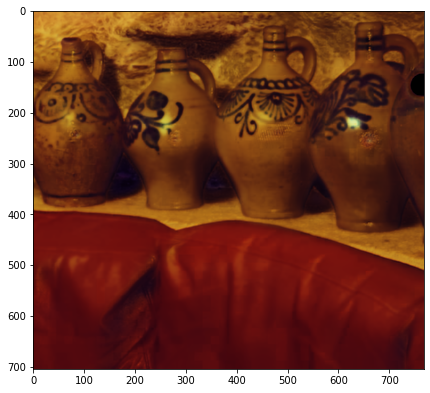

Iteration 00251    Loss 0.007468Iteration 00252    Loss 0.007464Iteration 00253    Loss 0.007510Iteration 00254    Loss 0.007585Iteration 00255    Loss 0.007618Iteration 00256    Loss 0.007635Iteration 00257    Loss 0.007832Iteration 00258    Loss 0.007821Iteration 00259    Loss 0.008353Iteration 00260    Loss 0.008868Iteration 00261    Loss 0.008497Iteration 00262    Loss 0.008036Iteration 00263    Loss 0.007983Iteration 00264    Loss 0.007858Iteration 00265    Loss 0.007958Iteration 00266    Loss 0.008106Iteration 00267    Loss 0.007716Iteration 00268    Loss 0.007787Iteration 00269    Loss 0.007657Iteration 00270    Loss 0.007794Iteration 00271    Loss 0.007883Iteration 00272    Loss 0.007656Iteration 00273    Loss 0.007626Iteration 00274    Loss 0.007445Iteration 00275    Loss 0.007508Iteration 00276    Loss 0.007515Iteration 00277    Loss 0.007550Iteration 00278    Loss 0.007556Iteration 00279    Loss 0.007486Iteration 00280    Loss 0.007421Iteration 00281    Loss 0.007371Iteratio

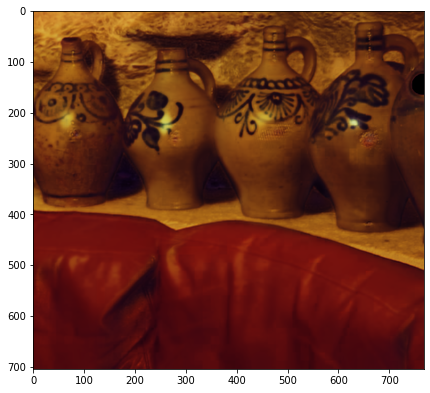

Iteration 00301    Loss 0.007440Iteration 00302    Loss 0.007595Iteration 00303    Loss 0.007482Iteration 00304    Loss 0.007608Iteration 00305    Loss 0.007477Iteration 00306    Loss 0.007526Iteration 00307    Loss 0.007543Iteration 00308    Loss 0.007477Iteration 00309    Loss 0.007570Iteration 00310    Loss 0.007531Iteration 00311    Loss 0.007555Iteration 00312    Loss 0.007507Iteration 00313    Loss 0.007403Iteration 00314    Loss 0.007308Iteration 00315    Loss 0.007314Iteration 00316    Loss 0.007277Iteration 00317    Loss 0.007201Iteration 00318    Loss 0.007186Iteration 00319    Loss 0.007192Iteration 00320    Loss 0.007204Iteration 00321    Loss 0.007165Iteration 00322    Loss 0.007160Iteration 00323    Loss 0.007164Iteration 00324    Loss 0.007152Iteration 00325    Loss 0.007191Iteration 00326    Loss 0.007258Iteration 00327    Loss 0.007536Iteration 00328    Loss 0.007971Iteration 00329    Loss 0.008373Iteration 00330    Loss 0.007707Iteration 00331    Loss 0.007817Iteratio

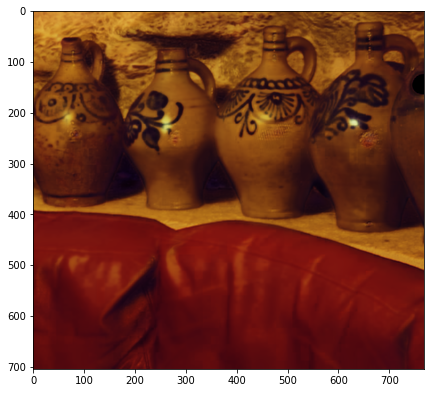

Iteration 00351    Loss 0.007307Iteration 00352    Loss 0.007280Iteration 00353    Loss 0.007219Iteration 00354    Loss 0.007167Iteration 00355    Loss 0.007121Iteration 00356    Loss 0.007168Iteration 00357    Loss 0.007267Iteration 00358    Loss 0.007175Iteration 00359    Loss 0.007085Iteration 00360    Loss 0.007101Iteration 00361    Loss 0.007152Iteration 00362    Loss 0.007203Iteration 00363    Loss 0.007126Iteration 00364    Loss 0.007133Iteration 00365    Loss 0.007239Iteration 00366    Loss 0.007202Iteration 00367    Loss 0.007338Iteration 00368    Loss 0.007464Iteration 00369    Loss 0.007438Iteration 00370    Loss 0.007397Iteration 00371    Loss 0.007552Iteration 00372    Loss 0.007284Iteration 00373    Loss 0.007458Iteration 00374    Loss 0.007303Iteration 00375    Loss 0.007186Iteration 00376    Loss 0.007205Iteration 00377    Loss 0.007206Iteration 00378    Loss 0.007236Iteration 00379    Loss 0.007207Iteration 00380    Loss 0.007282Iteration 00381    Loss 0.007193Iteratio

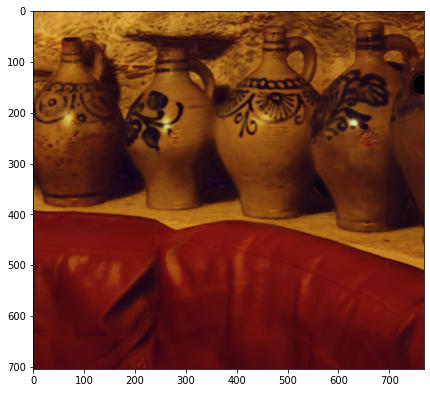

Iteration 00401    Loss 0.007039Iteration 00402    Loss 0.006977Iteration 00403    Loss 0.007112Iteration 00404    Loss 0.007221Iteration 00405    Loss 0.007181Iteration 00406    Loss 0.007208Iteration 00407    Loss 0.007077Iteration 00408    Loss 0.007085Iteration 00409    Loss 0.007056Iteration 00410    Loss 0.007100Iteration 00411    Loss 0.007110Iteration 00412    Loss 0.007050Iteration 00413    Loss 0.007056Iteration 00414    Loss 0.007101Iteration 00415    Loss 0.007056Iteration 00416    Loss 0.007094Iteration 00417    Loss 0.007026Iteration 00418    Loss 0.006939Iteration 00419    Loss 0.007005Iteration 00420    Loss 0.006990Iteration 00421    Loss 0.006994Iteration 00422    Loss 0.006949Iteration 00423    Loss 0.006948Iteration 00424    Loss 0.006977Iteration 00425    Loss 0.007035Iteration 00426    Loss 0.006989Iteration 00427    Loss 0.007014Iteration 00428    Loss 0.007017Iteration 00429    Loss 0.007048Iteration 00430    Loss 0.007067Iteration 00431    Loss 0.007063Iteratio

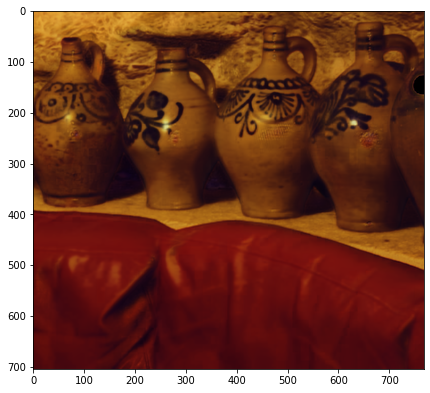

Iteration 00451    Loss 0.006918Iteration 00452    Loss 0.007018Iteration 00453    Loss 0.007188Iteration 00454    Loss 0.007431Iteration 00455    Loss 0.007376Iteration 00456    Loss 0.007401Iteration 00457    Loss 0.007393Iteration 00458    Loss 0.007741Iteration 00459    Loss 0.007855Iteration 00460    Loss 0.007683Iteration 00461    Loss 0.007283Iteration 00462    Loss 0.007219Iteration 00463    Loss 0.007096Iteration 00464    Loss 0.007250Iteration 00465    Loss 0.007334Iteration 00466    Loss 0.007286Iteration 00467    Loss 0.007244Iteration 00468    Loss 0.007122Iteration 00469    Loss 0.007040Iteration 00470    Loss 0.007035Iteration 00471    Loss 0.007039Iteration 00472    Loss 0.007077Iteration 00473    Loss 0.007009Iteration 00474    Loss 0.006965Iteration 00475    Loss 0.006912Iteration 00476    Loss 0.006890Iteration 00477    Loss 0.006947Iteration 00478    Loss 0.006906Iteration 00479    Loss 0.006912Iteration 00480    Loss 0.006887Iteration 00481    Loss 0.006875Iteratio

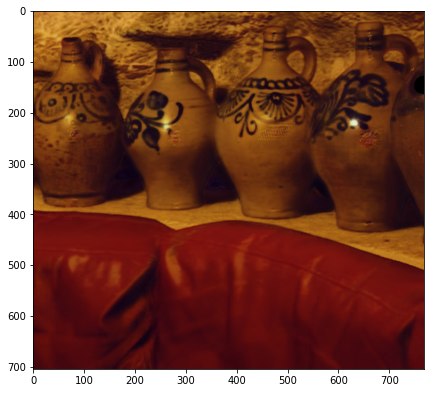

Iteration 00501    Loss 0.006912Iteration 00502    Loss 0.006972Iteration 00503    Loss 0.006910Iteration 00504    Loss 0.006927Iteration 00505    Loss 0.006879Iteration 00506    Loss 0.006860Iteration 00507    Loss 0.006872Iteration 00508    Loss 0.006859Iteration 00509    Loss 0.006860Iteration 00510    Loss 0.006809Iteration 00511    Loss 0.006875Iteration 00512    Loss 0.006872Iteration 00513    Loss 0.006884Iteration 00514    Loss 0.006931Iteration 00515    Loss 0.006989Iteration 00516    Loss 0.007136Iteration 00517    Loss 0.007310Iteration 00518    Loss 0.007504Iteration 00519    Loss 0.007409Iteration 00520    Loss 0.007408Iteration 00521    Loss 0.007169Iteration 00522    Loss 0.006980Iteration 00523    Loss 0.006820Iteration 00524    Loss 0.006853Iteration 00525    Loss 0.006983Iteration 00526    Loss 0.007054Iteration 00527    Loss 0.007091Iteration 00528    Loss 0.006950Iteration 00529    Loss 0.006921Iteration 00530    Loss 0.006851Iteration 00531    Loss 0.006806Iteratio

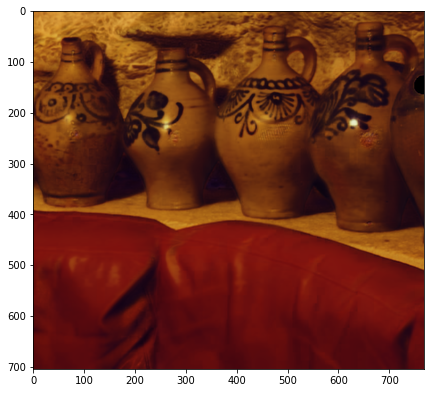

Iteration 00551    Loss 0.007059Iteration 00552    Loss 0.006896Iteration 00553    Loss 0.006855Iteration 00554    Loss 0.006940Iteration 00555    Loss 0.006861Iteration 00556    Loss 0.006841Iteration 00557    Loss 0.006861Iteration 00558    Loss 0.006788Iteration 00559    Loss 0.006848Iteration 00560    Loss 0.006797Iteration 00561    Loss 0.006773Iteration 00562    Loss 0.006796Iteration 00563    Loss 0.006770Iteration 00564    Loss 0.006758Iteration 00565    Loss 0.006750Iteration 00566    Loss 0.006736Iteration 00567    Loss 0.006747Iteration 00568    Loss 0.006752Iteration 00569    Loss 0.006778Iteration 00570    Loss 0.006771Iteration 00571    Loss 0.006869Iteration 00572    Loss 0.007113Iteration 00573    Loss 0.007181Iteration 00574    Loss 0.007011Iteration 00575    Loss 0.007133Iteration 00576    Loss 0.007023Iteration 00577    Loss 0.006991Iteration 00578    Loss 0.006907Iteration 00579    Loss 0.006834Iteration 00580    Loss 0.006814Iteration 00581    Loss 0.006789Iteratio

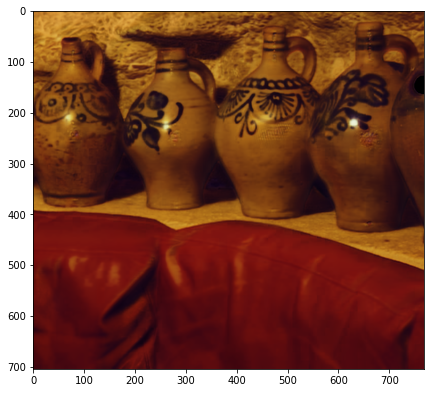

In [6]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()

l=[]
i = 0
def closure():
    
    global i, net_input,l
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    l=np.append(l,total_loss.item())
    
    total_loss.backward()
        
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), sep='\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


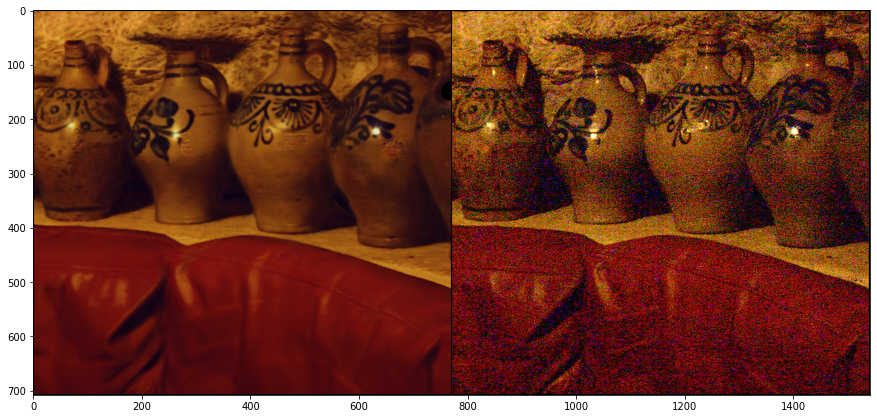

In [7]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);

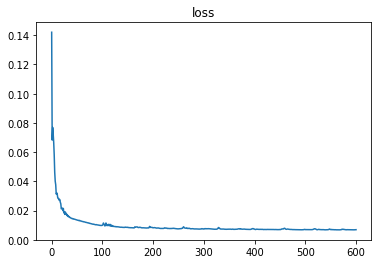

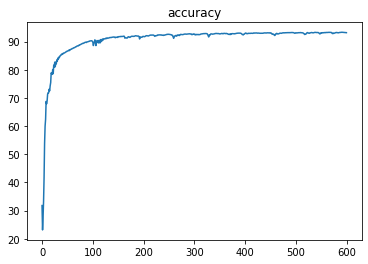

In [8]:
plt.title('loss')
plt.plot(l)
acc=[]
acc= 100-(l*1000)
acc=acc[1:]
#plt.legend()
plt.show()
plt.title('accuracy')
plt.plot(acc)
#plt.legend()
plt.show()

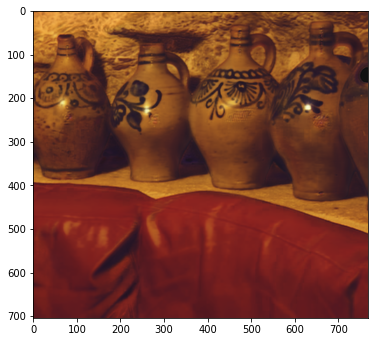

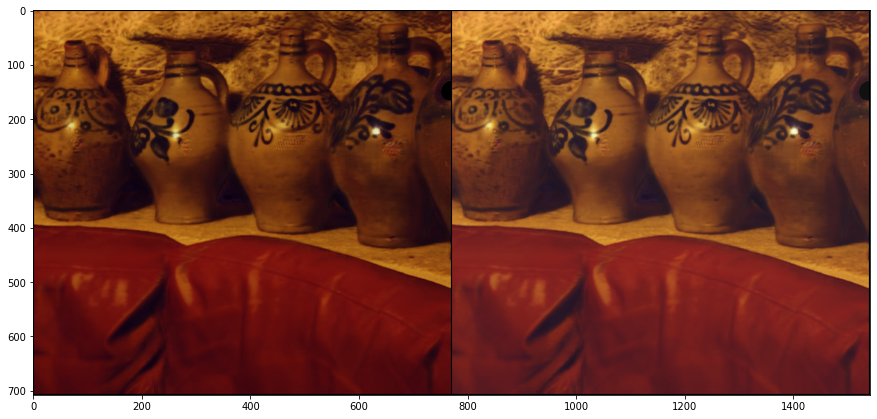

In [11]:
new_out_np=out_np+0.07
plot_image_grid([new_out_np], factor=5);
q = plot_image_grid([np.clip(out_np, 0, 1), new_out_np], factor=13);

--2020-05-27 06:46:30--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel [following]
--2020-05-27 06:46:30--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128948189 (123M)
Saving to: ‘models/colorization_release_v1.caffemodel’

models/colorization 100%[===================